# ***Processamento de Imagens com Python utilizando a biblioteca SKIMAGE para um pipeline básico: segmentação, deteção e classificação.***

# **Lendo e Exibindo Imagem:**

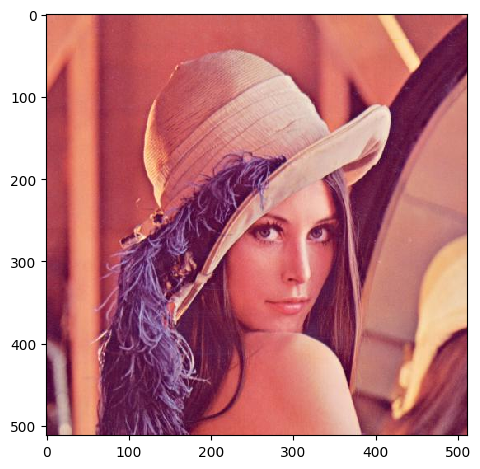

In [9]:
from skimage import io, feature
import matplotlib.pyplot as plt

# Carregue uma imagem de uma URL ou arquivo
imagem = io.imread('https://raw.githubusercontent.com/koyachi/go-lena/master/example/lena.result.jpg')

# Carregue a imagem do disco do colab (na pasta à esquerda)
#imagem = io.imread('nome_do_arquivo.jpg')

# Exiba a imagem
io.imshow(imagem)
io.show()

#******************************************************************************
# Salvar a imagem na pasta do Google Colab ao lado esquerdo
io.imsave('/content/NOME_DA_IMAGEM_1.jpg', imagem)

# **Detecção de Bordas (com Canny):**

Em skimage (scikit-image), o "Canny" refere-se ao algoritmo de detecção de bordas de Canny, que é uma técnica comummente usada para encontrar bordas em imagens. Este algoritmo foi desenvolvido por John F. Canny em 1986 e é amplamente utilizado na área de processamento de imagem.

O algoritmo de Canny funciona da seguinte forma:

**1. Suavização:** A primeira etapa envolve a aplicação de um filtro gaussiano para suavizar a imagem e reduzir o ruído. A suavização ajuda a eliminar pequenas variações de intensidade que não são de interesse para a detecção de bordas.

**2. Gradiente de Intensidade:** Em seguida, o algoritmo calcula o gradiente de intensidade da imagem suavizada. Isso envolve a aplicação de operadores de gradiente, como Sobel ou Prewitt, para calcular a magnitude do gradiente e a direção das mudanças de intensidade em cada pixel.

**3. Supressão de Não-Máximos:** O algoritmo examina os gradientes calculados e suprime os gradientes que não correspondem aos máximos locais. Isso ajuda a afinar as bordas.

**4. Limiarização:** Finalmente, a imagem é binarizada usando dois limiares: um limiar inferior e um limiar superior. Os pixels cujos valores de gradiente estão acima do limiar superior são considerados parte das bordas, os pixels abaixo do limiar inferior são descartados e os pixels entre os dois limiares são considerados bordas fracas.

A saída do algoritmo Canny é uma imagem binária na qual os pixels representam claramente as bordas na imagem original. Ele é amplamente utilizado em aplicações de visão computacional e processamento de imagem para segmentação de objetos, detecção de características e outras tarefas relacionadas a bordas em imagens.

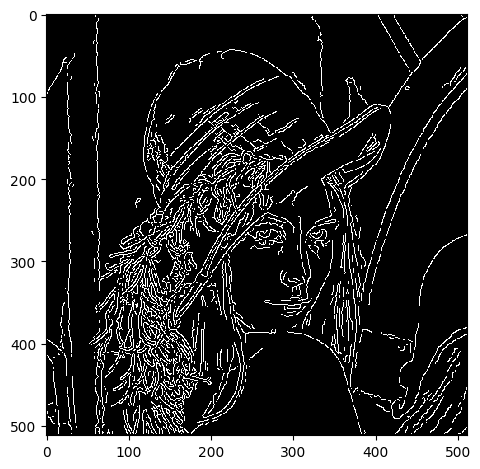

<ipython-input-10-a6eb84dafa00>:20: UserWarning: /content/NOME_DA_IMAGEM_2.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('/content/NOME_DA_IMAGEM_2.jpg', imagem_bordas)


In [10]:
from skimage import io, feature
import matplotlib.pyplot as plt

# Carregue uma imagem de uma URL ou arquivo
imagem_cinza = io.imread('https://raw.githubusercontent.com/koyachi/go-lena/master/example/lena.result.jpg', as_gray=True)
imagem_bordas = feature.canny(imagem_cinza) # algoritmo Canny para detectar bordas

#imagem_cinza = io.imread('NOME DA IMAGEM', as_gray=True))
#imagem_bordas = imagem_cinza

# Exiba a imagem
io.imshow(imagem_bordas)
io.show()

#plt.imshow(edges, cmap='gray')
#plt.show()

#******************************************************************************
# Salvar a imagem na pasta do Google Colab ao lado esquerdo
io.imsave('/content/NOME_DA_IMAGEM_2.jpg', imagem_bordas)

# **Detecçao de Contornos (com Measure)**

Em scikit-image (skimage), a função `skimage.measure.find_contours()` é usada para encontrar os contornos em uma imagem. Um contorno é uma linha que representa a fronteira entre duas regiões de intensidade diferentes em uma imagem. Essa função é frequentemente utilizada em tarefas de processamento de imagem e análise de imagem para extrair informações sobre objetos ou características em uma imagem.

O que a função `skimage.measure.find_contours()` faz:

1. **Entrada**: A função recebe uma imagem em escala de cinza ou uma imagem binária como entrada. Essa imagem deve conter regiões de intensidade diferentes que você deseja analisar.

2. **Limiar (threshold)**: O segundo argumento da função é um valor de limiar (threshold), que define o critério para encontrar os contornos. Pixels com intensidades acima desse limiar são considerados parte dos contornos.

3. **Saída**: A função retorna uma lista de contornos, onde cada contorno é representado como uma matriz NumPy de coordenadas. Cada matriz de coordenadas contém os pontos que formam o contorno, onde as colunas representam as coordenadas x (horizontal) e y (vertical).

4. **Uso**: Você pode percorrer a lista de contornos para acessar as coordenadas dos pontos que formam os contornos. Isso é útil para várias tarefas, como detecção de objetos, medição de áreas, extração de características e muito mais.

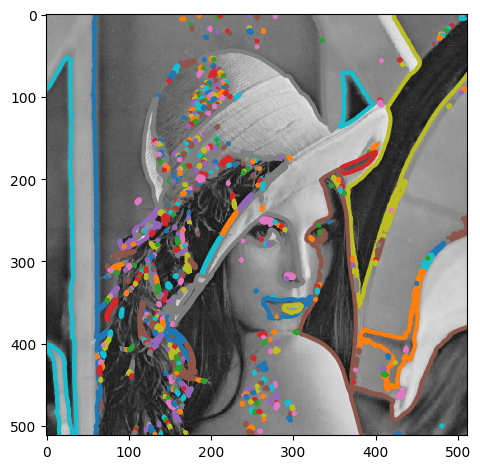

In [11]:
from skimage import io, measure
import matplotlib.pyplot as plt

# Carregar a imagem em escala de cinza
imagem_cont = io.imread('https://raw.githubusercontent.com/koyachi/go-lena/master/example/lena.result.jpg', as_gray=True)
#imagem_cont = io.imread('NOME DA IMAGEM', as_gray=True)

# Encontrar os contornos na imagem escolhendo o valor do limite
contornos = measure.find_contours(imagem_cont, 0.5) # o limite (threshold) de 0 a 1 é usado para determinar quais pixels da imagem fazem parte dos contornos.

# Criar uma figura e um eixo para exibir a imagem
fig, ax = plt.subplots()
ax.imshow(imagem_cont, cmap='gray')

# Desenhar os contornos encontrados na imagem
for contorno in contornos:
    ax.plot(contorno[:, 1], contorno[:, 0], linewidth=3)

# Exiba a imagem com os contornos
io.imshow(imagem_cont)
io.show()


# **Segmentação e Análise de Regiões**
A função `measure.regionprops` da biblioteca scikit-image (skimage) é utilizada para calcular diversas propriedades ou características das regiões de uma imagem. As "regiões" referem-se a áreas conectadas na imagem que compartilham a mesma etiqueta ou rótulo. Essa função é frequentemente usada após a segmentação da imagem para análise de objetos ou regiões individuais.

A função `measure.regionprops` retorna uma lista de objetos, onde cada objeto representa uma região na imagem segmentada e contém várias propriedades que descrevem essa região. Algumas das propriedades comuns que podem ser calculadas incluem:

1. **Área:** A área da região, que é o número de pixels que a região contém.

2. **Perímetro:** O perímetro da região.

3. **Centróide:** As coordenadas do centróide da região.

4. **Limites (Bounding Box):** As coordenadas da caixa delimitadora que envolve a região.

5. **Maior e Menor Eixos:** Os comprimentos dos principais e menores eixos da elipse que melhor se ajusta à região.

6. **Orientação:** A orientação da elipse que melhor se ajusta à região.

7. **Média de Intensidade:** A média das intensidades dos pixels dentro da região.

8. **Desvio Padrão de Intensidade:** O desvio padrão das intensidades dos pixels dentro da região.

9. **Excentricidade:** A excentricidade da elipse que melhor se ajusta à região.

Um exemplo simples de como usar `measure.regionprops` para calcular essas propriedades:

```python
from skimage import io, measure

# Carregue a imagem segmentada (onde as regiões têm etiquetas)
image = io.imread('imagem_segmentada.png')

# Calcule as propriedades das regiões
regions = measure.regionprops(image)

# Itere sobre as regiões e imprima algumas propriedades
for region in regions:
    print(f"Área: {region.area}")
    print(f"Perímetro: {region.perimeter}")
    print(f"Centróide: {region.centroid}")
    print(f"Limites (Bounding Box): {region.bbox}")
    print(f"Maior Eixo: {region.major_axis_length}")
    print(f"Menor Eixo: {region.minor_axis_length}")
    print(f"Orientação: {region.orientation}")
    print(f"Média de Intensidade: {region.mean_intensity}")
    print(f"Desvio Padrão de Intensidade: {region.std_intensity}")
    print(f"Excentricidade: {region.eccentricity}")
    print("------")
```

Essas propriedades são úteis para caracterizar e analisar objetos ou regiões em uma imagem após a segmentação e podem ser usadas em uma variedade de tarefas de processamento de imagem e análise de imagem.


# **Desenhando contornos nos objetos da imagem**

O código abaixo percorre os contornos dentro da imagem e desenha um retângulo ao redor de cada objeto na imagem. Isso é feito encontrando os pontos extremos do contorno, calculando as dimensões do retângulo e criando um retângulo com borda vermelha.

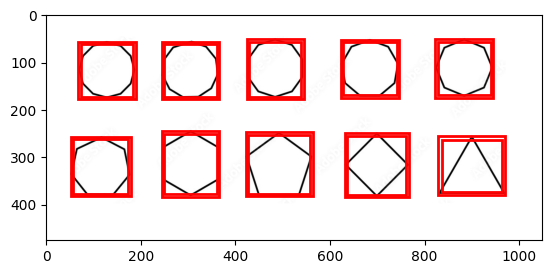

In [12]:
from skimage import io, measure
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Carregar a imagem
# imagem_cinza = io.imread('https://raw.githubusercontent.com/koyachi/go-lena/master/example/lena.result.jpg', as_gray=True)

# Carregar a imagem em escala de cinza
imagem_cinza = io.imread('https://github.com/Zolinad/Proc_Imag_-_Vis_Comp/blob/main/imagens_pi/poligonos1.jpg?raw=true', as_gray=True)

# Encontrar os contornos dos objetos na imagem
contornos = measure.find_contours(imagem_cinza, 0.8)

# Criar uma figura para exibir a imagem e os retângulos
fig, ax = plt.subplots()
ax.imshow(imagem_cinza, cmap='gray')

# Percorrer os contornos e desenhar um retângulo ao redor de cada objeto
for contorno in contornos:
    # Encontrar os pontos extremos do contorno
    ymin, xmin = contorno.min(axis=0)
    ymax, xmax = contorno.max(axis=0)

    # Calcular as dimensões do retângulo
    largura = xmax - xmin
    altura = ymax - ymin

    # Criar um retângulo
    retangulo = patches.Rectangle((xmin, ymin), largura, altura, linewidth=2, edgecolor='r', facecolor='none')

    # Adicionar o retângulo à figura
    ax.add_patch(retangulo)

# Exibir a imagem com os retângulos
plt.show()


# **Detectando e Classificando objetos simples na imagem (i)**

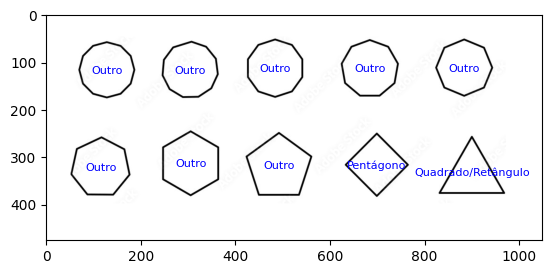

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters
from skimage.segmentation import clear_border
from skimage.morphology import closing, square
from skimage.filters import threshold_otsu
from skimage.measure import approximate_polygon, find_contours

# Função para identificar o tipo de polígono
def identificar_poligono(contorno):
    # Aproximar o contorno para reduzir o número de pontos
    epsilon = 0.02 * np.max(np.ptp(contorno, axis=0))  # Fator de aproximação
    contorno_aproximado = approximate_polygon(contorno, tolerance=epsilon)

    num_vertices = len(contorno_aproximado)

    # Classificar com base no número de vértices
    if num_vertices == 3:
        return "Triângulo"
    elif num_vertices == 4:
        return "Quadrado/Retângulo"
    elif num_vertices == 5:
        return "Pentágono"
    elif num_vertices == 6:
        return "Hexágono"
    else:
        return "Outro"

# Carregar a imagem em escala de cinza
imagem_cinza = io.imread('https://github.com/DafzData/Proc_Imag__Vis_Comp__BSI-2024/blob/main/aula3/poligonos1.jpg', as_gray=True)

# Aplicar limiar para segmentação
thresh = threshold_otsu(imagem_cinza)
binario = closing(imagem_cinza > thresh, square(3))

# Remover pequenos objetos conectados à borda
limpo = clear_border(binario)

# Encontrar contornos na imagem binarizada
contornos = find_contours(limpo, 0.5)

# Criar uma figura para exibir a imagem e os rótulos
fig, ax = plt.subplots()
ax.imshow(imagem_cinza, cmap='gray')

# Percorrer cada contorno identificado
for contorno in contornos:
    # Identificar o tipo de polígono
    poligono = identificar_poligono(contorno)

    # Posicionar o rótulo no centróide do polígono
    yc, xc = np.mean(contorno, axis=0)
    ax.text(xc, yc, poligono, color='blue', fontsize=8, ha='center', va='center')

# Exibir a imagem com as detecções e rótulos
plt.show()
